<a href="https://colab.research.google.com/github/BNLCSISMR/Smoking-Obesity-Project/blob/main/XGBoost_SmokingTumorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install GEOparse



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import GEOparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline



gse = GEOparse.get_GEO(geo="GSE46699", destdir="./")


06-Nov-2022 23:10:10 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
06-Nov-2022 23:10:10 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
06-Nov-2022 23:10:10 INFO GEOparse - Parsing ./GSE46699_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE46699_family.soft.gz: 
06-Nov-2022 23:10:10 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
06-Nov-2022 23:10:10 DEBUG GEOparse - SERIES: GSE46699
DEBUG:GEOparse:SERIES: GSE46699
06-Nov-2022 23:10:10 DEBUG GEOparse - PLATFORM: GPL570
DEBUG:GEOparse:PLATFORM: GPL570
/usr/local/lib/python3.7/dist-packages/GEOparse/GEOparse.py:545: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  table_data = parse_table_data(gpl_soft)
06-Nov-2022 23:10:12 DEBUG GEOparse - SAMPLE: GSM1134764
DEBUG:GEOparse:SAMPLE: GSM1134764
06-Nov-2022 23:10:12 DEBUG GEOparse - SAMPLE: GSM11347

In [3]:
import pandas as pd
import torch


In [4]:

print()
print("GSM example:")

for gsm_name, gsm in gse.gsms.items():
    print("Name: ", gsm_name)
    print("Metadata:",)
    for key, value in gsm.metadata.items():
        if(key == 'characteristics_ch1'):
         print(value[1])
         print(value[2])
         print(value[3])
    #print ("Table data:",)
    #print (gsm.table.head())
    

print()

#print("GPL example:")
#for gpl_name, gpl in gse.gpls.items():
 #   print("Name: ", gpl_name)
  #  print("Metadata:",)
   # for key, value in gpl.metadata.items():
    #    print(" - %s : %s" % (key, ", ".join(value)))
    #print("Table data:",)
    #print(gpl.table.head())
    #break


GSM example:
Name:  GSM1134764
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134765
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134766
Metadata:
tissue: normal
smoking: yes
obese: no
Name:  GSM1134767
Metadata:
tissue: tumor
smoking: yes
obese: no
Name:  GSM1134768
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134769
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134770
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134771
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134772
Metadata:
tissue: normal
smoking: yes
obese: no
Name:  GSM1134773
Metadata:
tissue: tumor
smoking: yes
obese: no
Name:  GSM1134774
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134775
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134776
Metadata:
tissue: normal
smoking: yes
obese: no
Name:  GSM1134777
Metadata:
tissue: tumor
smoking: yes
obese: no
Name:  GSM1134778
Metadata:
tissue: normal
smoking: yes
obese: yes
Name:  GSM

Printing the name, head, and items

Create a merged table of the first gsm table we have. Print the head and test out accessing one column

In [5]:
mergedTable = gsm.table
entry = mergedTable["VALUE"]

Iterate through all of the tables and add the values column to the end of the mergedTable

In [6]:
for gsm_name, gsm in gse.gsms.items():
    entry = gsm.table["VALUE"]
    mergedTable.insert(1, gsm_name, value=entry, allow_duplicates=True)
    ##mergedTable = mergedTable.assign(gsm_name = entry)

    ##gsm.table = pd.merge(mergedTable, gsm.table, how = 'inner')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


Print mergedTable

drop the last column as it is a duplicate

In [7]:
mergedTable = mergedTable.iloc[: , :-1]

Transpose the table to make ID_REF the index

In [8]:
newMergeTable = mergedTable.transpose()

In [9]:
newMergeTable = newMergeTable.rename(columns=newMergeTable.iloc[0])
newMergeTable = newMergeTable.iloc[1: , :]

In [10]:
tissueList = []
tissue_label = []
smokingList = []
smoking_label = []
obesityList = []
obesity_label = []
for gsm_name, gsm in gse.gsms.items():
    for key, value in gsm.metadata.items():
        if(key == 'characteristics_ch1'):
         substringOne = 'tumor'
         substringTwo = 'yes'
         substringThree = 'yes'
         
         ##Appending all the values to tissue list if its a tumor or not (tumor = 1 normal = 0)
         if substringOne in value[1]:
           tissueList.append(1)
           tissue_label.append('tumor')
         else:
           tissueList.append(0)
           tissue_label.append('normal')
         
         ##Appending all teh values to the smoking list(smoker=1 non-smoker = 0)
         if substringTwo in value[2]:
           smokingList.append(1)
           smoking_label.append('yes')
         else:
           smokingList.append(0)
           smoking_label.append('no')

        ##Appending all teh values to the obesity list(obese = 1 not obese = 0)
         if substringThree in value[3]:
           obesityList.append(1)
           obesity_label.append('yes')
         else:
           obesityList.append(0)
           obesity_label.append('no')
  
print(tissueList)
print(tissue_label)

print(smokingList)
print(smoking_label)

print(obesityList)
print(obesity_label)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0]
['normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 

Creating a labels dataframe

In [11]:
#class_labels = pd.DataFrame()

#class_labels['Tissue'] = tissueList
#class_labels['Smoker'] = smokingList
#class_labels['Obesity'] = obesityList
print(newMergeTable)
#print(class_labels)
newMergeTable.shape

            1007_s_at   1053_at    117_at     121_at 1255_g_at   1294_at  \
GSM1304423  10.465147  5.131448  6.003662  11.353257  3.580513  7.227263   
GSM1304422   10.69537  6.117586  6.233694  11.162211  3.420228  7.583564   
GSM1304421   9.785637  4.844387  5.841087  11.198888  3.461025  7.071538   
GSM1304420  10.023791  6.786107  6.438581   9.745609  3.431811  7.204418   
GSM1134889    8.99498  5.530289  5.672777   9.624678  4.034493  6.979319   
...               ...       ...       ...        ...       ...       ...   
GSM1134768  10.106417  4.827499  5.668851  11.194256   3.47619  7.254072   
GSM1134767  10.735899  6.154403  6.539063  10.490871  3.499183  7.313254   
GSM1134766   9.919435  4.628159  5.636217  11.073223  3.479632  7.034347   
GSM1134765   9.812106  5.776783  6.422235  11.142645  3.524682  7.052937   
GSM1134764  10.654552  5.104113  5.372776  11.908765  3.500414  7.154525   

             1316_at   1320_at 1405_i_at   1431_at  ... AFFX-r2-Ec-bioD-3_at  \
GSM1304

(130, 54675)

Using tree based feature selection to get importance scores

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(newMergeTable, tissueList)
importances = clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
newMergeTableTwo = model.transform(newMergeTable)


importance_List = []




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


creating a list of all importance scores

In [13]:
for i,v in enumerate(importances):
	importance_List.append(v)
print(importance_List)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008212903735291796, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005690012759926352, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008698820347100685, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

sorting all the scores descending

In [14]:
sortedImportance_List = sorted(importance_List, reverse=True)
print(sortedImportance_List)

len(importance_List)


[0.0029017789077110563, 0.002530915256712925, 0.0022634605509703697, 0.002194435938757808, 0.0021726863517908296, 0.002110416148716672, 0.0020832243646742576, 0.002073154303180642, 0.002032665815245454, 0.001976367209027437, 0.0019535973718549223, 0.001952693399805665, 0.001951413715525489, 0.00193747008398242, 0.0019306142636857488, 0.0019238345913242124, 0.001922828365484616, 0.0019071287532803083, 0.0018787316070632274, 0.0018557735755329872, 0.0018267671911218883, 0.0017953411325834917, 0.001785148002337915, 0.0017744876741817512, 0.0017690220927555392, 0.001763159658556624, 0.0017508663109605776, 0.0017384047202347016, 0.0017276859413116912, 0.0017139547914245855, 0.001711021611519124, 0.0016809120753683657, 0.0016768011792887415, 0.0016768011792887413, 0.0016697339161107284, 0.0016667162429960497, 0.0016577920032614525, 0.0016573902288188006, 0.0016564055862448794, 0.0016534907454872098, 0.0016523580134098967, 0.001648221477645785, 0.001645213087999155, 0.0016343976002206565, 0.0

54675

concrete example to help

Gets the index of the sorted features scores and adds them to list

In [15]:
from sklearn.preprocessing import scale
from sklearn import decomposition
print("FEATURE IMPORTANCES", importance_List)
print("FEATURE IMPORTANCES(SORTED)", sortedImportance_List)
importance_indices = []

for i in sortedImportance_List:
  importance_indices.append(importance_List.index(i))

print("INDICES",importance_indices)

FEATURE IMPORTANCES [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008212903735291796, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005690012759926352, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008698820347100685, 0.0, 0.0, 0.0, 0.0, 

Check if the code worked

In [16]:
print(importance_List[12704])

0.0


In [17]:
x = []
for i in range(300):
  x.append(i)
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

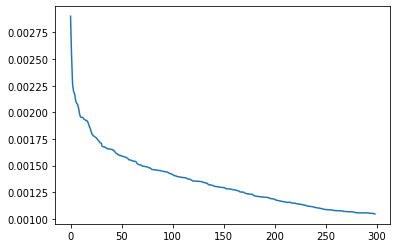

In [18]:
plt.plot(x[0:299], sortedImportance_List[0:299])
plt.show()

Now time to create a new table of only the most important features

In [19]:
finalMergeTable = pd.DataFrame()

numFeatures = 200

#number of iterations based on how many features may be changed based on how many create a good PCA plot
for i in range (numFeatures):
  targetColumn = newMergeTable.iloc[:,importance_indices[i]]
  finalMergeTable.insert(len(finalMergeTable.columns), i, targetColumn)

print(finalMergeTable)


                 0         1         2         3         4         5    \
GSM1304423  6.436457  5.562039  7.177758  5.443523  9.271816  6.429259   
GSM1304422   7.89923  5.856818  6.889682  5.079701   9.31821  6.527554   
GSM1304421  7.216716  5.720909  7.251489   5.26365  8.987483  6.275309   
GSM1304420  9.312917  5.642363  6.702272  4.852821  9.457293  7.268447   
GSM1134889   6.94804  6.285334   6.20134  4.876881  8.052212  6.916148   
...              ...       ...       ...       ...       ...       ...   
GSM1134768  6.258622   5.53696  7.070709  5.478017  8.537826  5.951843   
GSM1134767  8.438363  6.332393  6.236386  4.819408  9.023789  6.192668   
GSM1134766  6.654418  5.437369  6.939861  5.258155  8.617906  6.032377   
GSM1134765  8.100294   5.91698  7.027024  4.958925  8.422894  6.422941   
GSM1134764  5.789242  5.085036  6.528067  5.326427  8.957845  6.430827   

                 6         7         8         9    ...       190       191  \
GSM1304423  6.048666  4.064909  

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


In [20]:
pca = decomposition.PCA(n_components=4)
pca.fit(finalMergeTable)



PCA(n_components=4)

In [21]:
scores = pca.transform(finalMergeTable)

In [22]:
scores_df = pd.DataFrame(scores, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
scores_df

,PC1,PC2,PC3,PC4
0,3.408290,-1.615551,-2.500057,-1.570706
1,-1.406081,-0.208885,2.645947,3.329916
2,3.914016,-2.302116,2.287621,-0.848007
3,-6.385795,0.290730,-0.091764,0.278375
4,0.041499,6.879377,-0.238030,-1.315518
...,...,...,...,...
125,4.839425,-0.173458,-1.098193,1.166606
126,-5.176890,1.322374,0.510256,0.144048
127,5.154910,-0.863557,-1.052052,0.470362
128,-3.969696,1.160250,0.026758,2.751234


In [23]:
for v in pca.explained_variance_ratio_:
    print('Explained variation per principal component: {}%'.format(round(v*100,2)))

Explained variation per principal component: 30.97%
Explained variation per principal component: 12.43%
Explained variation per principal component: 8.85%
Explained variation per principal component: 6.78%


In [24]:
import plotly.express as px

In [25]:
# Label to color dict (manual)
label_color_dict_tissue = {'tumor':'red','normal':'green'}
label_color_dict_obesity = {'yes': 'red', 'no': 'green'}
label_color_dict_smoker = {'yes': 'red', 'no': 'green'}

# Color vector creation
cvec_tissue = [label_color_dict_tissue[label] for label in tissue_label]
cvec_obesity = [label_color_dict_obesity[label] for label in obesity_label]
cvec_smoker = [label_color_dict_smoker[label] for label in smoking_label]

shape_tissue = []
for i in cvec_tissue:
  if(i=='green'):
    shape_tissue.append('normal')
  else:
    shape_tissue.append('tumor')

new_shape_tissue=pd.DataFrame()
new_shape_tissue['marker'] = shape_tissue

In [26]:
print(cvec_tissue)
print(shape_tissue)
print(new_shape_tissue)

['green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'red', 'green', 'red', 'green', 'red', 'red', 'r

In [27]:
#plt.figure(figsize=(8,8))
#for marker in shape_tissue:
#  plt.scatter(scores[:,0], scores[:,2],
#              c=cvec_tissue, edgecolor='', alpha=0.5, marker = marker)
#plt.xlabel('PC 1')
#plt.ylabel('PC 3')
#plt.show()

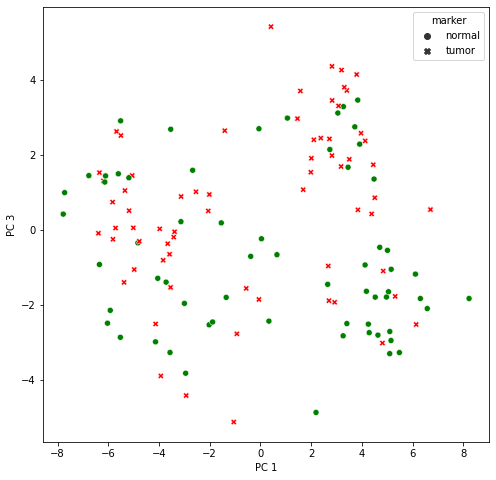

In [28]:
import seaborn as sns
plt.figure(figsize=(8,8))

sns.scatterplot(x=scores[:,0], y=scores[:,2], c=cvec_tissue, style=new_shape_tissue['marker'])
plt.xlabel('PC 1')
plt.ylabel('PC 3')
plt.show()

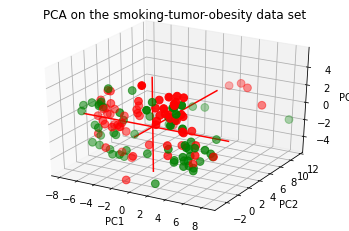

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scores[:,0], scores[:,1], scores[:,2], c=cvec_tissue, cmap="Set2_r", s=60)

xAxisLine = ((min(scores[:,0]), max(scores[:,0])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(scores[:,1]), max(scores[:,1])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(scores[:,2]), max(scores[:,2])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the smoking-tumor-obesity data set")
plt.show()

logsitic regression is sensitive to noise we chooose most important features so it can handle and make it more linearly separable

ensemble method (XGBoost):

https://www.nvidia.com/en-us/glossary/data-science/xgboost/
https://en.wikipedia.org/wiki/Gradient_boosting
multi perceptron data good at handling non-linear data but requires more training data

EXPLAIN EVERYTHING in simple but detailed way

Target Word Count: --> five pages (maybe even 10 pages)

SPLIT INTO TRAIN VALID AND TEST if test too small then use cross-validation https://scikit-learn.org/stable/modules/cross_validation.html

Standardizing - not used

In [30]:
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()

#finalMergeTable['Smoker'] = smokingList
#finalMergeTable['Obesity'] = obesityList

#final_normalized = sc.fit_transform(finalMergeTable)

In [31]:
finalMergeTable['Tissue'] = tissueList
finalMergeTable

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Tissue
GSM1304423,6.436457,5.562039,7.177758,5.443523,9.271816,6.429259,6.048666,4.064909,7.165003,5.741587,...,3.426596,6.111562,7.265912,3.066751,3.048971,7.435811,4.696467,7.209205,4.181559,0
GSM1304422,7.89923,5.856818,6.889682,5.079701,9.31821,6.527554,6.065331,4.114493,7.453788,5.290877,...,3.395277,6.261759,7.577249,2.919498,3.167665,7.299763,4.68578,7.66539,3.902035,1
GSM1304421,7.216716,5.720909,7.251489,5.26365,8.987483,6.275309,6.253349,4.182728,7.290644,5.773059,...,3.358095,5.574582,7.48929,2.935114,3.013408,7.172058,4.437172,7.543934,4.009709,0
GSM1304420,9.312917,5.642363,6.702272,4.852821,9.457293,7.268447,6.329591,4.37878,7.444674,4.749242,...,3.805516,4.491649,7.310512,2.929268,3.146249,7.451444,4.833932,7.657882,3.539348,1
GSM1134889,6.94804,6.285334,6.20134,4.876881,8.052212,6.916148,6.103251,3.676672,6.957983,4.206329,...,4.336677,4.149335,7.360901,3.587773,3.309223,6.832474,5.170369,7.425339,3.759895,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1134768,6.258622,5.53696,7.070709,5.478017,8.537826,5.951843,6.419279,3.977921,7.170879,6.427704,...,3.530097,5.221858,7.172689,3.20212,3.083955,6.754285,4.964152,7.081692,3.684782,1
GSM1134767,8.438363,6.332393,6.236386,4.819408,9.023789,6.192668,6.998244,4.16,7.597434,4.940141,...,4.377977,5.386811,7.278432,2.996213,3.114815,7.338245,5.022862,7.876443,3.639331,1
GSM1134766,6.654418,5.437369,6.939861,5.258155,8.617906,6.032377,6.488099,3.939251,7.294739,7.537463,...,3.48862,3.931313,6.850562,2.983849,2.961734,6.85116,4.860624,6.971726,3.751044,0
GSM1134765,8.100294,5.91698,7.027024,4.958925,8.422894,6.422941,6.688923,4.373523,6.877401,4.857317,...,3.270169,3.961275,7.495244,2.963606,3.226489,7.790383,5.223963,8.288569,3.650424,1


In [32]:
#trying to make the objects into floats
for i in range(numFeatures):
  finalMergeTable.iloc[:, i] = finalMergeTable.iloc[:, i].astype(float, errors = 'raise')
finalMergeTable['Tissue'] = finalMergeTable['Tissue'].astype(float, errors = 'raise')

finalMergeTable.dtypes

0         float64
1         float64
2         float64
3         float64
4         float64
           ...   
196       float64
197       float64
198       float64
199       float64
Tissue    float64
Length: 201, dtype: object

In [33]:
finalMergeTable

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Tissue
GSM1304423,6.436457,5.562039,7.177758,5.443523,9.271816,6.429259,6.048666,4.064909,7.165003,5.741587,...,3.426596,6.111562,7.265912,3.066751,3.048971,7.435811,4.696467,7.209205,4.181559,0.0
GSM1304422,7.899230,5.856818,6.889682,5.079701,9.318210,6.527554,6.065331,4.114493,7.453788,5.290877,...,3.395277,6.261759,7.577249,2.919498,3.167665,7.299763,4.685780,7.665390,3.902035,1.0
GSM1304421,7.216716,5.720909,7.251489,5.263650,8.987483,6.275309,6.253349,4.182728,7.290644,5.773059,...,3.358095,5.574582,7.489290,2.935114,3.013408,7.172058,4.437172,7.543934,4.009709,0.0
GSM1304420,9.312917,5.642363,6.702272,4.852821,9.457293,7.268447,6.329591,4.378780,7.444674,4.749242,...,3.805516,4.491649,7.310512,2.929268,3.146249,7.451444,4.833932,7.657882,3.539348,1.0
GSM1134889,6.948040,6.285334,6.201340,4.876881,8.052212,6.916148,6.103251,3.676672,6.957983,4.206329,...,4.336677,4.149335,7.360901,3.587773,3.309223,6.832474,5.170369,7.425339,3.759895,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1134768,6.258622,5.536960,7.070709,5.478017,8.537826,5.951843,6.419279,3.977921,7.170879,6.427704,...,3.530097,5.221858,7.172689,3.202120,3.083955,6.754285,4.964152,7.081692,3.684782,1.0
GSM1134767,8.438363,6.332393,6.236386,4.819408,9.023789,6.192668,6.998244,4.160000,7.597434,4.940141,...,4.377977,5.386811,7.278432,2.996213,3.114815,7.338245,5.022862,7.876443,3.639331,1.0
GSM1134766,6.654418,5.437369,6.939861,5.258155,8.617906,6.032377,6.488099,3.939251,7.294739,7.537463,...,3.488620,3.931313,6.850562,2.983849,2.961734,6.851160,4.860624,6.971726,3.751044,0.0
GSM1134765,8.100294,5.916980,7.027024,4.958925,8.422894,6.422941,6.688923,4.373523,6.877401,4.857317,...,3.270169,3.961275,7.495244,2.963606,3.226489,7.790383,5.223963,8.288569,3.650424,1.0


In [34]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

var_colums = [c for c in finalMergeTable.columns if c not in ['Tissue']]
X = finalMergeTable.loc[:, var_colums]
y = finalMergeTable.loc[:, 'Tissue']



X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [35]:
X.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
195    float64
196    float64
197    float64
198    float64
199    float64
Length: 200, dtype: object

In [36]:
print(X)

                 0         1         2         3         4         5    \
GSM1304423  6.436457  5.562039  7.177758  5.443523  9.271816  6.429259   
GSM1304422  7.899230  5.856818  6.889682  5.079701  9.318210  6.527554   
GSM1304421  7.216716  5.720909  7.251489  5.263650  8.987483  6.275309   
GSM1304420  9.312917  5.642363  6.702272  4.852821  9.457293  7.268447   
GSM1134889  6.948040  6.285334  6.201340  4.876881  8.052212  6.916148   
...              ...       ...       ...       ...       ...       ...   
GSM1134768  6.258622  5.536960  7.070709  5.478017  8.537826  5.951843   
GSM1134767  8.438363  6.332393  6.236386  4.819408  9.023789  6.192668   
GSM1134766  6.654418  5.437369  6.939861  5.258155  8.617906  6.032377   
GSM1134765  8.100294  5.916980  7.027024  4.958925  8.422894  6.422941   
GSM1134764  5.789242  5.085036  6.528067  5.326427  8.957845  6.430827   

                 6         7         8         9    ...       190       191  \
GSM1304423  6.048666  4.064909  

In [37]:
print(y)

GSM1304423    0.0
GSM1304422    1.0
GSM1304421    0.0
GSM1304420    1.0
GSM1134889    0.0
             ... 
GSM1134768    1.0
GSM1134767    1.0
GSM1134766    0.0
GSM1134765    1.0
GSM1134764    0.0
Name: Tissue, Length: 130, dtype: float64


Using kaggle and Git reference(other colab)
https://www.kaggle.com/code/prashant111/xgboost-k-fold-cv-feature-importance/notebook 

https://github.com/harsh1kumar/learning/blob/master/machine_learning/santander_trxn_prediction/07_trxn_pred_xgboost.ipynb 

In [38]:
#model = XGBClassifier()
#model.fit(X_train, y_train)

model_xgboost = xgboost.XGBClassifier(learning_rate=0.02,
                                      max_depth=5,
                                     n_estimators=5000,
                                     subsample=0.5,
                                     colsample_bytree=0.5,
                                     eval_metric='auc',
                                     verbosity=1, 
                                      enable_categorical=True)

eval_set = [(X_valid, y_valid)]

model_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.47619
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.598214
[2]	validation_0-auc:0.645833
[3]	validation_0-auc:0.66369
[4]	validation_0-auc:0.699405
[5]	validation_0-auc:0.696429
[6]	validation_0-auc:0.714286
[7]	validation_0-auc:0.72619
[8]	validation_0-auc:0.75
[9]	validation_0-auc:0.732143
[10]	validation_0-auc:0.720238
[11]	validation_0-auc:0.738095
[12]	validation_0-auc:0.738095
[13]	validation_0-auc:0.744048
[14]	validation_0-auc:0.767857
[15]	validation_0-auc:0.744048
[16]	validation_0-auc:0.72619
[17]	validation_0-auc:0.738095
[18]	validation_0-auc:0.732143
[19]	validation_0-auc:0.72619
[20]	validation_0-auc:0.732143
[21]	validation_0-auc:0.738095
[22]	validation_0-auc:0.738095
[23]	validation_0-auc:0.732143
[24]	validation_0-auc:0.690476
Stopping. Best iteration:
[14]	validation_0-auc:0.767857



XGBClassifier(colsample_bytree=0.5, enable_categorical=True, eval_metric='auc',
              learning_rate=0.02, max_depth=5, n_estimators=5000,
              subsample=0.5)

Evaluating Model Performance


In [39]:
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.9952
AUC Valid: 0.7679


Hyperparamter Fine-Tuning

In [40]:
learning_rate_list = [0.02, 0.05, 0.1]
max_depth_list = [2, 3, 5]
n_estimators_list = [1000, 2000, 3000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print(num_combinations)
params_dict

27


{'learning_rate': [0.02, 0.05, 0.1],
 'max_depth': [2, 3, 5],
 'n_estimators': [1000, 2000, 3000]}

In [41]:
def my_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict_proba(X)[:,1])

model_xgboost_hp = GridSearchCV(estimator=xgboost.XGBClassifier(subsample=0.5,
                                                                colsample_bytree=0.25,
                                                                eval_metric='auc',
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=2,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=4)

model_xgboost_hp.fit(X, y)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=1.000, test=0.789) total time=   0.3s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=1.000, test=0.789) total time=   0.2s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=1.000, test=0.790) total time=   0.5s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=1.000, test=0.788) total time=   0.7s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=1.000, test=0.790) total time=   1.2s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=1.000, test=0.788) total time=   1.2s
[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=1.000, test=0.802) total time=   0.4s
[CV 2/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=1.000, test=0.783) total time=   0.4s
[CV

GridSearchCV(cv=2,
             estimator=XGBClassifier(colsample_bytree=0.25, eval_metric='auc',
                                     subsample=0.5, use_label_encoder=False),
             param_grid={'learning_rate': [0.02, 0.05, 0.1],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [1000, 2000, 3000]},
             return_train_score=True,
             scoring=<function my_roc_auc_score at 0x7f56d534eef0>, verbose=4)

Let us look at the output of grid search step. We will retain only a few relevant columns and sort based on rank_test_score i.ee the performance on validation data

In [42]:
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
19,1,0.798581,1.0,0.1,2,2000
18,2,0.797163,1.0,0.1,2,1000
20,3,0.796210,1.0,0.1,2,3000
5,4,0.796199,1.0,0.02,3,3000
15,5,0.795738,1.0,0.05,5,1000
12,5,0.795738,1.0,0.05,3,1000
11,7,0.795278,1.0,0.05,2,3000
13,8,0.795263,1.0,0.05,3,2000
16,8,0.795263,1.0,0.05,5,2000
23,10,0.794784,1.0,0.1,3,3000


Let us try to find how does model perfomance vary with respect to number of trees and depth of tree

Text(0.5, 1.0, 'Performance with # of Trees and Depth')

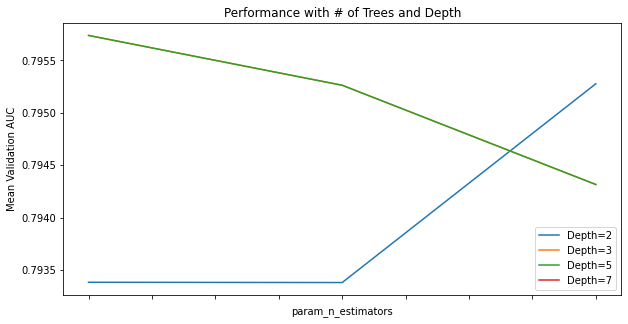

In [43]:
# First sort by number of estimators as that would be x-axis
df_cv_results.sort_values(by='param_n_estimators', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==2),:]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==3),:]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==5),:]
lr_d7 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==7),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)
lr_d7.plot(x='param_n_estimators', y='mean_test_score', label='Depth=7', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance with # of Trees and Depth')

Now that we have seen the performance is higher for higher values of trees and lower depth, let us find performance w.r.t. learning rate. We fix n_estimators to 3000 and depth to 2.

Text(0.5, 1.0, 'Performance wrt learning rate')

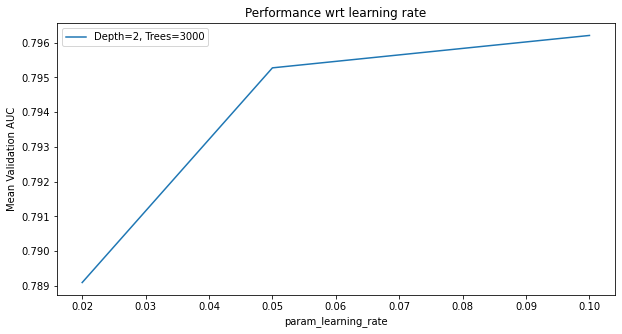

In [44]:
# First sort by learning rate as that would be x-axis
df_cv_results.sort_values(by='param_learning_rate', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_t3k_d2 = df_cv_results.loc[(df_cv_results['param_n_estimators']==3000) & (df_cv_results['param_max_depth']==2),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='Depth=2, Trees=3000', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

Final Model after hyperparameter tuning

In [45]:
model_xgboost_fin = xgboost.XGBClassifier(learning_rate=0.02,
                                          max_depth=2,
                                          n_estimators=5000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both
eval_set = [(X_train, y_train),(X_valid, y_valid)]

model_xgboost_fin.fit(X_train,
                  y_train,
                  early_stopping_rounds=20,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.711617	validation_1-auc:0.467262
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.807436	validation_1-auc:0.607143
[2]	validation_0-auc:0.86552	validation_1-auc:0.639881
[3]	validation_0-auc:0.904181	validation_1-auc:0.654762
[4]	validation_0-auc:0.918979	validation_1-auc:0.714286
[5]	validation_0-auc:0.932667	validation_1-auc:0.705357
[6]	validation_0-auc:0.958935	validation_1-auc:0.755952
[7]	validation_0-auc:0.972253	validation_1-auc:0.755952
[8]	validation_0-auc:0.977063	validation_1-auc:0.755952
[9]	validation_0-auc:0.980392	validation_1-auc:0.738095
[10]	validation_0-auc:0.980762	validation_1-auc:0.75
[11]	validation_0-auc:0.983722	validation_1-auc:0.738095
[12]	validation_0-auc:0.988901	validation_1-auc:0.72619
[13]	validation_0-auc:0.990381	validation_1-auc:0.761905
[14]	validation_0-auc:0.988901	validation_1-auc:0.72619
[15]	

XGBClassifier(colsample_bytree=0.25, eval_metric='auc', learning_rate=0.02,
              max_depth=2, n_estimators=5000, subsample=0.5,
              use_label_encoder=False)

Let us find out the performance of the final model by calculating AUC value on training and validation sets



In [46]:
y_train_pred = model_xgboost_fin.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost_fin.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.9904
AUC Valid: 0.7619


Graph AUC

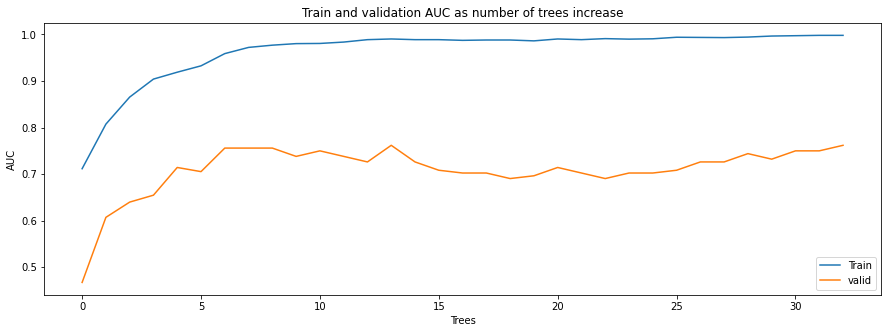

In [47]:
evaluation_results = model_xgboost_fin.evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = evaluation_results['validation_0']['auc']
valid_auc_tree = evaluation_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(valid_auc_tree, label='valid')

plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()